 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st
from scipy import special as sp
import statistics
import math

# to handle file imports for different OS
import os
from pathlib import Path 

In [2]:
folder = Path(os.getcwd())
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read_csv(file2)

In [3]:
print(dseng_df)

       Month                Car      Location Weather TypeOfTrigger  \
0     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
1     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
2     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
3     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
4     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
...      ...                ...           ...     ...           ...   
1019  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1020  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1021  14-Nov  WDD2221851A000495       highway   clear        manual   
1022  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1023  14-Nov  WDD2221851A000495  urban-street   clear        manual   

      ReactionTime                              Cause  
0             0.58  Incorrect Traffic Light Detection  
1             0.66    Adverse road 

In [4]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

# TASK 0] PROB 2) (a) Total number of AV disengagements: 1024

In [5]:
dseng_df

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions
...,...,...,...,...,...,...,...
1019,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault
1020,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,System Tuning and Calibration
1021,14-Nov,WDD2221851A000495,highway,clear,manual,NaN,System Tuning and Calibration
1022,14-Nov,WDD2221851A000495,urban-street,clear,manual,NaN,Hardware Fault


In [6]:
dseng_df['Month'].nunique()

15

# TASK 0] PROB 2) (b) Number of unique months that have recorded AV disengagements: 15

In [7]:
len(dseng_df['Location'].unique())

2

# TASK 0] PROB 2) (c) List of unique locations of AV disengagements: 2

In [8]:
len(dseng_df['Cause'].unique())

10

# TASK 0] PROB 2) (d) Number of unique causes for AV disengagements: 10 

In [9]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
dtype: int64

# TASK 0] PROB 2) ReactionTime has 532 missing values

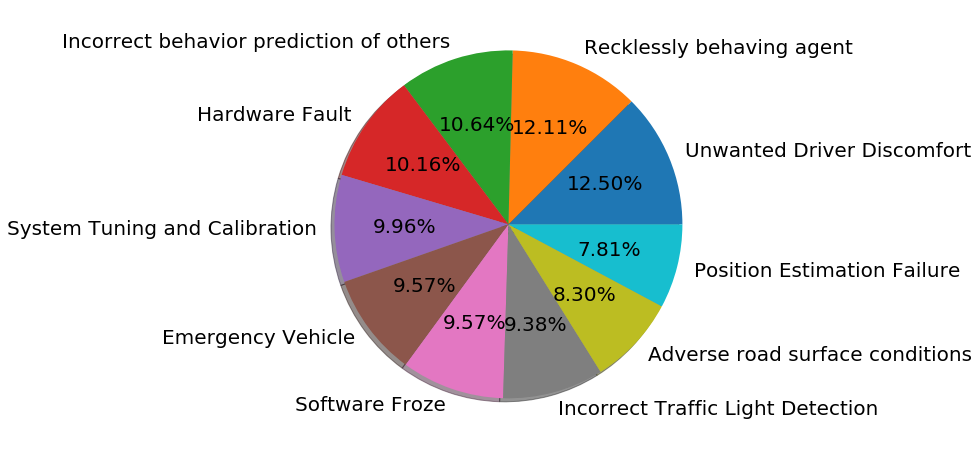

In [10]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.2f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

# TASK 0] PROB 3) The top two leading causes of disengagement: Recklessly behaving agent and Unwanted Driver Discomfort

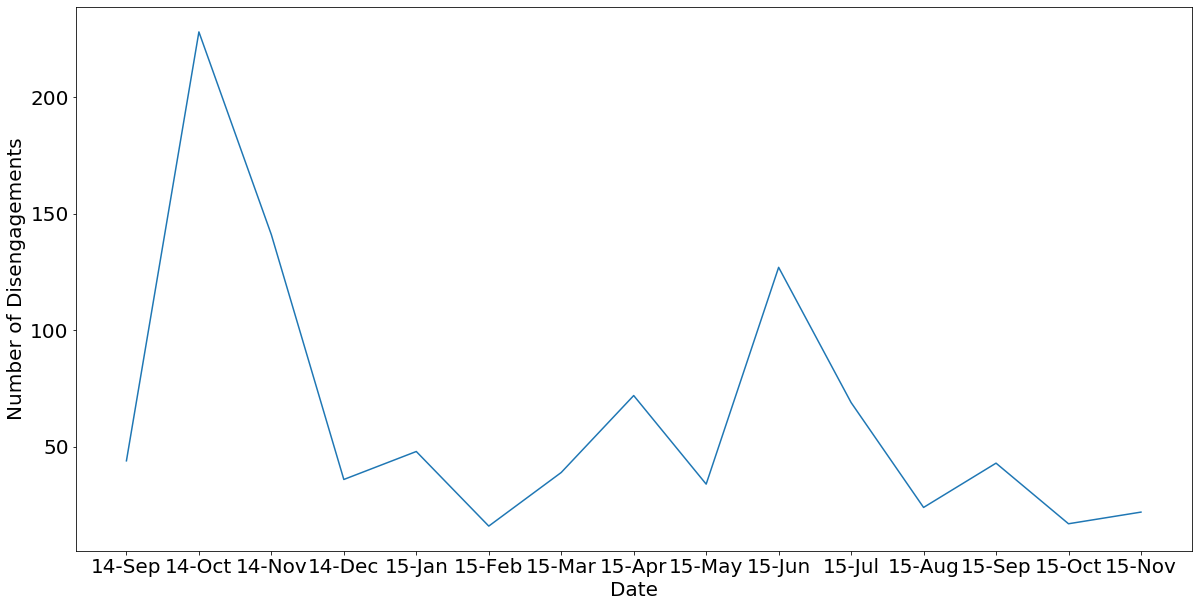

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(20,10))

plt.plot(summary_month_df['Month'].iloc[:15],summary_month_df['total number of disengagements'].iloc[:15]) 
#plt.plot(figsize=(20,10), linewidth=5, fontsize=20)
     # 'total number of disengagements'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date',fontsize=20);
plt.ylabel('Number of Disengagements',fontsize=20);

Text(0.5, 1.0, 'Probability distribution for Reaction Time')

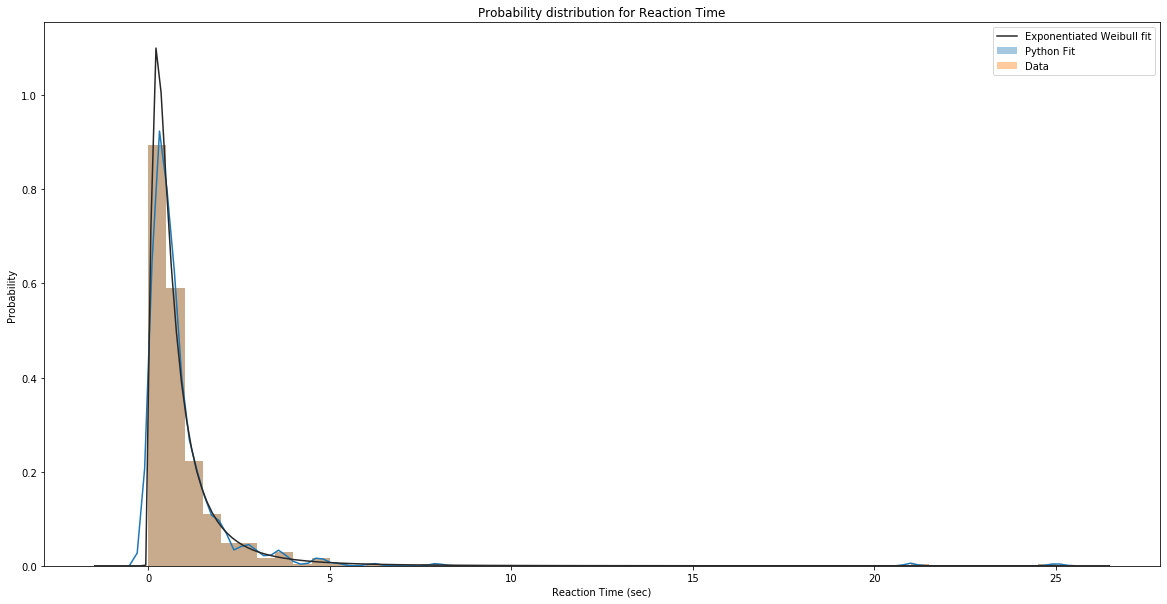

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig=plt.figure(figsize=(20,10))

ax=sns.distplot(dseng_df['ReactionTime'].dropna())
ax=sns.distplot(dseng_df['ReactionTime'].dropna(), kde=False, fit=st.exponweib)

#ax=sns.distplot(dseng_df['ReactionTime'].dropna(), kde=False, fit=st.gamma,color='g')
#ax=sns.distplot(dseng_df['ReactionTime'].dropna(), kde=False, fit=st.expon)
ax.set_ylabel('Probability')
ax.set_xlabel('Reaction Time (sec)')
plt.legend(['Exponentiated Weibull fit', 'Python Fit', 'Data'])
plt.title('Probability distribution for Reaction Time')

# TASK 1] PROB 2) Distribution fits exponential curve

In [13]:
dseng_df['ReactionTime'].dropna().mean()


0.9297703252032526

# TASK 1] PROB 3)(a): Avg reaction time is: 0.9297703252032526 secs

In [14]:
dseng_df['ReactionTime'].groupby(dseng_df['Location']).mean()

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

# TASK 1] PROB 3)(b): Avg reaction time differentiated by location: 
## Highway - 1.48000 secs
## urban-street - 0.92865 secs

In [18]:
t1=1.09
t2=0.9297703252032526
#H0: Mean time is same t1=t2
#Assume H0 is true and calculate P(t_mean=t2) (i.e.the p-value)

statistics.variance(dseng_df['ReactionTime'].dropna())
#using sample mean as population mean because the sample size is large (492)
sigma=statistics.variance(dseng_df['ReactionTime'].dropna())/math.sqrt(dseng_df['ReactionTime'].dropna().count())

#Calculating z-statistic
z=(t2-t1)/sigma
print("Z value is " + str(z))
p_value = sp.ndtr(z)
print("P-value is " + str(p_value))

Z value is -1.239182779030916
P-value is 0.10763890828403105


# TASK 1] PROB 4) Since p-value>0.05, we cannot reject null hypothesis and cannot say that the mean times are different (i.e. we cannot say that the alternate hypothesis could be true)

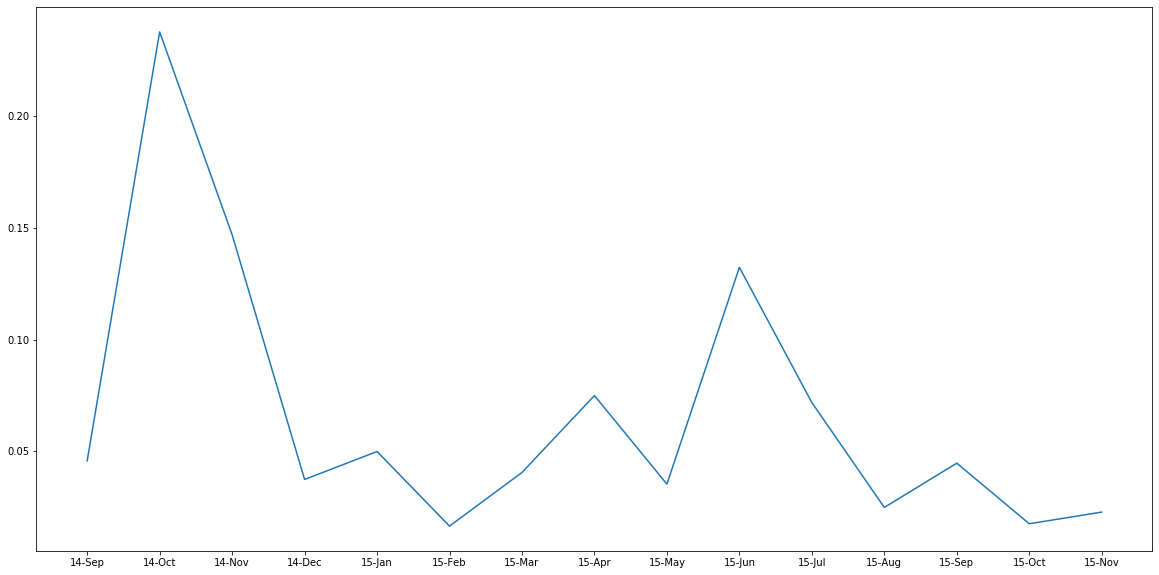

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig=plt.figure(figsize=(20,10))
plt.plot(summary_month_df['Month'].iloc[:15],summary_month_df['total number of disengagements'].iloc[:15]/sum(summary_month_df['total number of disengagements'].iloc[:15])) 
